# __AIRLINE PASSENGER SATISFACTION__

## __Exploratory Data Analysis__

In [1]:
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
data = pd.read_csv('satis_clean.csv')
data.tail()

,Satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,5,5,5,3,2,5,2,2,3,3,4,4,4,2,0,0.0
129876,neutral or dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2,3,2,4,2,1,1,3,2,3,3,1,2,1,174,172.0
129877,neutral or dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,3,0,3,3,3,2,2,4,4,3,4,2,3,2,155,163.0
129878,neutral or dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,3,2,3,2,3,2,2,3,3,2,3,2,1,2,193,205.0
129879,neutral or dissatisfied,Female,disloyal Customer,38,Personal Travel,Eco,3,4,3,3,3,3,3,4,5,5,5,3,3,3,185,186.0


> __MISSING VALUE__

Let's look at Arrival Delay in Minutes column because there are several missing values.

__Before__

In [3]:
data['Arrival Delay in Minutes'].isna().sum()

393

In [4]:
data['Arrival Delay in Minutes'].describe()

count    129487.000000
mean         15.091129
std          38.465650
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

But i will fillna with median in for visualization, then impute with pipeline in Modelling Notebook later.

In [5]:
data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].median(), inplace=True)

__After__

In [6]:
data['Arrival Delay in Minutes'].describe()

count    129880.000000
mean         15.045465
std          38.416353
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

In [7]:
data['Arrival Delay in Minutes'].isna().sum()

0

#### __Descriptive Analysis__

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

In [9]:
data.describe()

,Age,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.045465
std,15.119360,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.416353
min,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [10]:
data.describe(include = 'O')

,Satisfaction,Gender,Customer Type,Type of Travel,Class
count,129880,129880,129880,129880,129880
unique,2,2,2,2,3
top,satisfied,Female,Loyal Customer,Business travel,Business
freq,71087,65899,106100,89693,62160


This dataset contain 22columns with 129880 rows and non null data.
<br> From 17 columns that numerical, there are 14 columns that ordinal value (response of satisfaction level surveys).
<br> Then, 5 columns are categorical value with 2 - 3 uniques.

#### __Data Visualization Schema__

The dataset we currently have contains 22 columns, i will divide into 4 categories in visualization based on basic knowledge:
1. Passengers satisfaction : level satisfaction of airline passengers
<br>Satisfaction
2. Passenger information : all information about passenger
<br>Gender, Age, Customer type, Type of Travel, Class, Departure Delay in Minutes, Arrival Delay in Minutes
3. Airline service Satisfaction : service often involves assistance from people
- Before flight: Departure/Arrival time convenient, online support, Ease of Online booking, Baggage handling, Checkin service, Online boarding 
- In flight: food and drink, On-board service, cleanliness
4. Airline Facilities Satisfaction:  Facilities are often things
<br>seat comfort, gate location, inflight entertainment, inflight wifi service, and Leg room service.

> #### __Passenger Satisfaction__

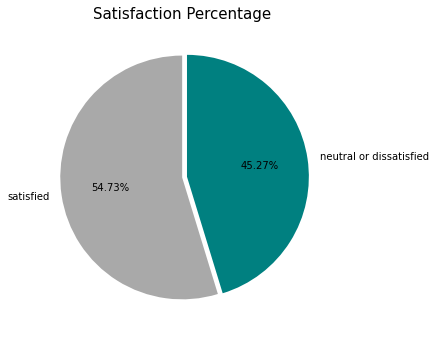

In [11]:
values = list(data['Satisfaction'].value_counts().values)
labels = list(data['Satisfaction'].value_counts().index)
colors = ['darkgrey', 'teal']
explode = [0, 0.04]

plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, explode = explode,
        startangle=90, autopct=lambda p:f'{p:.2f}%', colors = colors)
plt.title('Satisfaction Percentage', fontsize = 15)
plt.tight_layout()

# plt.savefig('0_satis.png')
# plt.savefig('0_satis_t.png', transparent = True)
plt.show()

Target data is balanced enough with satisfied passenger (54,73%) and neutral/dissatisfied (45,27%). 
<br> I dont need to resampling later.

> #### __Passenger information__

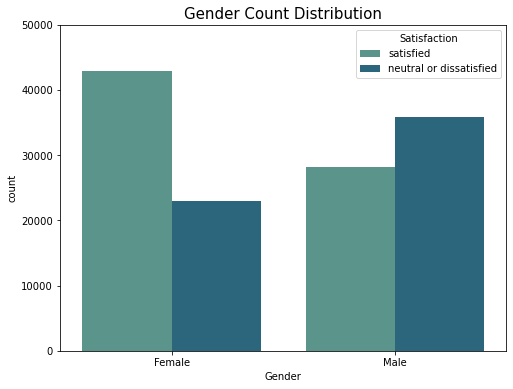

In [12]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'Gender', hue = 'Satisfaction', data = data, palette = 'crest')
plt.title('Gender Count Distribution', fontsize = 15)
plt.ylim(0,50000)

# plt.savefig('1_gender.png')
# plt.savefig('1_gender_t.png', transparent = True)
plt.show()

From the visualization above, it can be seen that the proportion of female who are satisfied is higher than that of male.
<br> Meanwhile, the proportion of male who felt neutral / dissatisfied was higher than that of female.

<Figure size 1440x360 with 0 Axes>

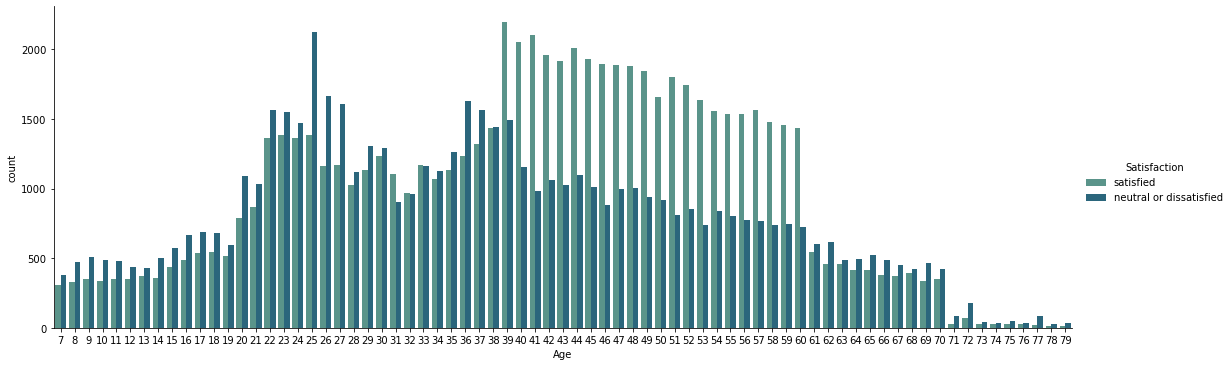

In [13]:
plt.figure(figsize = (20,5))

sns.catplot(x = 'Age', data = data, aspect = 3.0, kind = 'count', hue = 'Satisfaction', order=range(7, 80), palette = 'crest')

# plt.savefig('2_age.png')
# plt.savefig('2_age_t.png', transparent = True)
plt.show()

Most of passenger who feel more satisfied after flown with the airline are passengers between the ages 39 years old and 60 years old, than younger passengers.

__Are Loyal Customers Less Price Sensitive?__

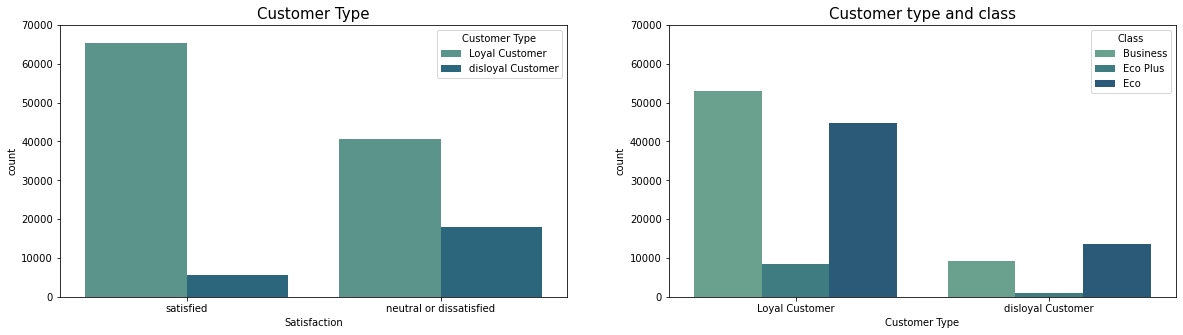

In [14]:
plt.figure(figsize = (20, 5))

plt.subplot(121)
sns.countplot(x='Satisfaction', data = data, hue = 'Customer Type', palette = 'crest')
plt.title('Customer Type', size = 15)
plt.ylim(0, 70000)


plt.subplot(122)
sns.countplot(x='Customer Type', data = data, hue = 'Class', hue_order = ['Business', 'Eco Plus', 'Eco'] , palette = 'crest')
plt.title('Customer type and class', size = 15)
plt.ylim(0, 70000)

# plt.savefig('3_typeandclass.png')
# plt.savefig('3_typeandclass_t.png', transparent = True)

plt.show()

Loyal passengers are very high in satisfied and dissatisfied, likewise the loyal customer categories is the largest passengers number who travel with us.
<br> Especially on business class trips where basically business ticket prices are much more expensive.

Notes about [Class Level]('https://www.momondo.com/discover/economy-business-and-first-class-seats')

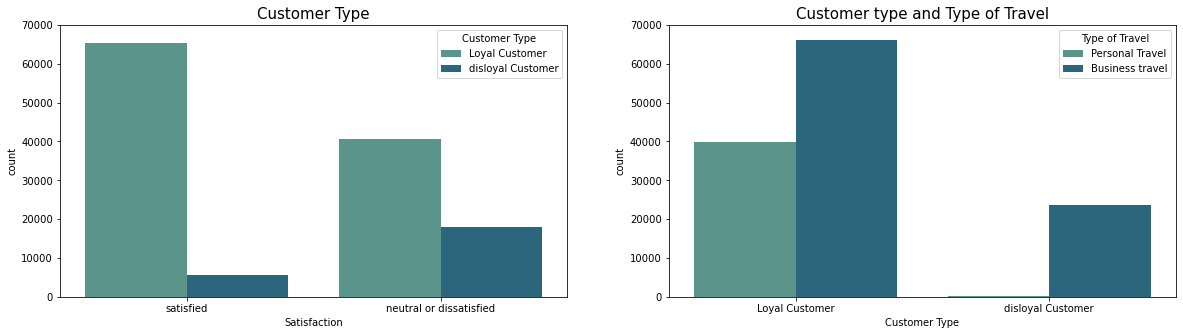

In [15]:
plt.figure(figsize = (20, 5))

plt.subplot(121)
sns.countplot(x='Satisfaction', data = data, hue = 'Customer Type', palette = 'crest')
plt.title('Customer Type', size = 15)
plt.ylim(0, 70000)

plt.subplot(122)
sns.countplot(x='Customer Type', data = data, hue = 'Type of Travel', palette = 'crest')
plt.title('Customer type and Type of Travel', size = 15)
plt.ylim(0, 70000)


# plt.savefig('4_typetravelandcustomer.png')
# plt.savefig('4_typetravelandcustomer_t.png', transparent = True)
plt.show()

Loyal customers have a very large number of trip, both in personal travel and in business travel.
<br> And, it turns out that disloyal customers rarely travel and even then, maybe they only travel for business purposes (most likely they are traveling that paid by the office).

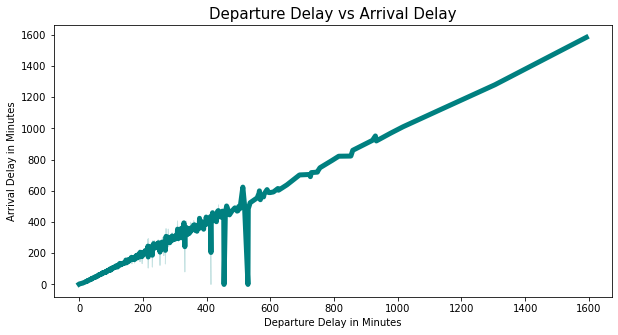

In [16]:
plt.figure(figsize=(10, 5))

sns.lineplot(data = data, x='Departure Delay in Minutes', y = 'Arrival Delay in Minutes', color = 'teal', linewidth = 5)
plt.title('Departure Delay vs Arrival Delay', size = 15)

# plt.savefig('5_delay.png')
# plt.savefig('5_delay_t.png', transparent = True)
plt.show()

From the visualization above, departure delay timer and arrival delay time is linear enough.
<br> Logically, if the plane departs later than expected, the plane must also arrive later.
In the last notebook, between "Delay in Departures in Minutes" and "Delay in Arrival in Minutes" has highest correlation over all columns with 0.97. 

> #### __Airline Service__

__BEFORE FLIGHT__

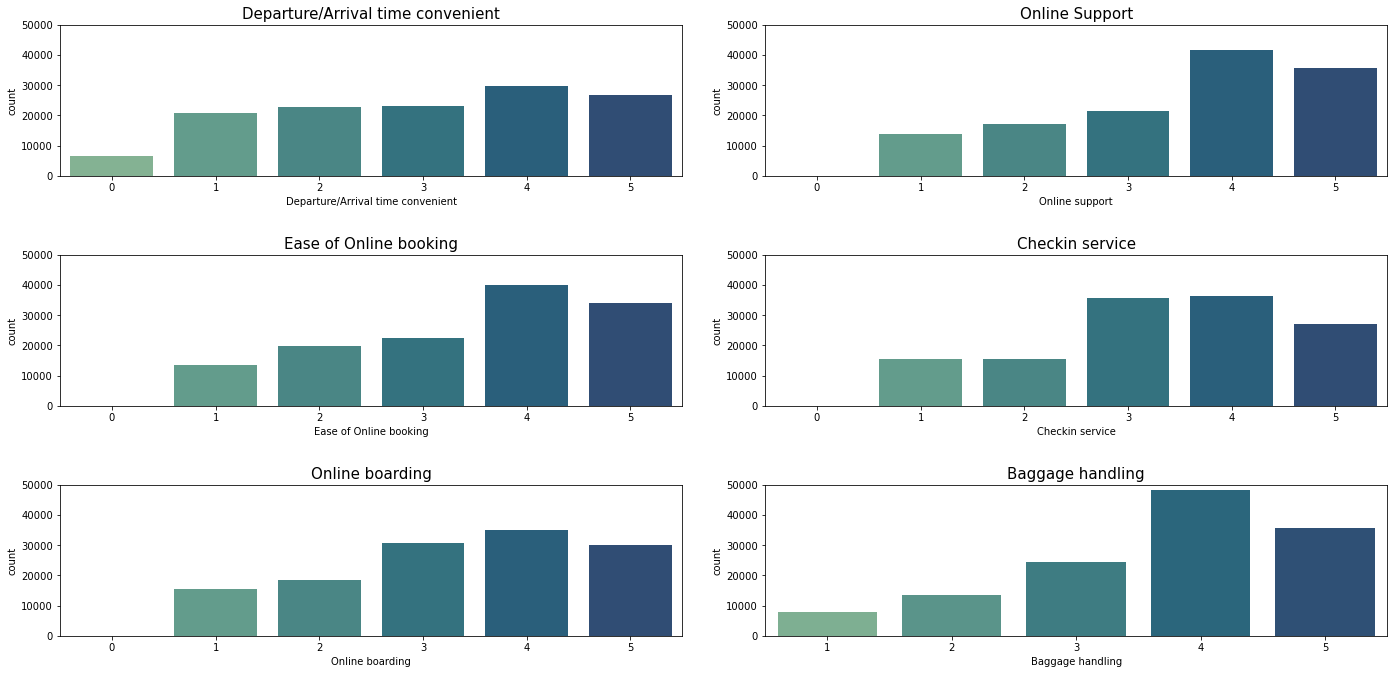

In [17]:
plt.figure(figsize = (20, 10))

plt.subplot(321)
sns.countplot(x='Departure/Arrival time convenient', data = data, palette = 'crest')
plt.title('Departure/Arrival time convenient', size = 15)
plt.ylim(0, 50000)

plt.subplot(322)
sns.countplot(x='Online support', data = data, palette = 'crest')
plt.title('Online Support', size = 15)
plt.ylim(0, 50000)

plt.subplot(323)
sns.countplot(x='Ease of Online booking', data = data, palette = 'crest')
plt.title('Ease of Online booking', size = 15)
plt.ylim(0, 50000)

plt.subplot(324)
sns.countplot(x='Checkin service', data = data, palette = 'crest')
plt.title('Checkin service', size = 15)
plt.ylim(0, 50000)

plt.subplot(325)
sns.countplot(x='Online boarding', data = data, palette = 'crest')
plt.title('Online boarding', size = 15)
plt.ylim(0, 50000)

plt.subplot(326)
sns.countplot(x='Baggage handling', data = data, palette = 'crest')
plt.title('Baggage handling', size = 15)
plt.ylim(0, 50000)

plt.tight_layout(pad = 3)

# plt.savefig('6_beforeflight.png')
# plt.savefig('6_beforeflight_t.png', transparent = True)
plt.show()

From this visualization, we can see that in airline service before flight aspect:

- Passenger who give 0 is quite small, the only one service that no 0 point is baggage handling and the highest number is Departure/Arrival time convenient.
- There are many passengers who give 1 and 2 points in Departure/Arrival time convenient aspect. They are also the most passengers giving 0 points in number than other aspect in service inflight. 
- The best aspect from before flight service are online support and baggage handling.
- Departure/Arrival time convenient aspects should be considered and improved.

__IN FLIGHT__

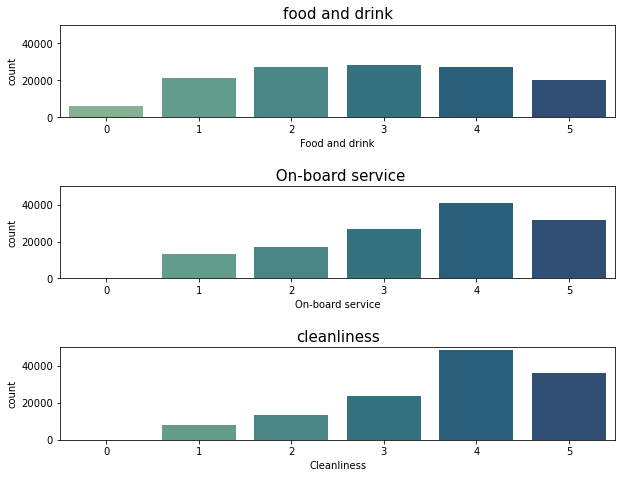

In [18]:
plt.figure(figsize = (9, 7))

plt.subplot(311)
sns.countplot(x='Food and drink', data = data, palette = 'crest')
plt.title('food and drink', size = 15)
plt.ylim(0, 50000)

plt.subplot(312)
sns.countplot(x='On-board service', data = data, palette = 'crest')
plt.title(' On-board service', size = 15)
plt.ylim(0, 50000)

plt.subplot(313)
sns.countplot(x='Cleanliness', data = data, palette = 'crest')
plt.title('cleanliness', size = 15)
plt.ylim(0, 50000)

plt.tight_layout(pad = 2)

# plt.savefig('7_inflight.png')
# plt.savefig('7_inflight_t.png', transparent = True)
plt.show()

From this visualization, we can see that in airline service inflight aspect:
- There are many passengers who give 1 and 2 points in food and drink aspect. They are also the most passengers giving 0 points in number than other aspect in service inflight. This aspect should be considered and improved, there may be a problem with these services.
- The best aspect from inflight service is cleanliness.

> __AIRLINE FACILITIES SATISFACTION__

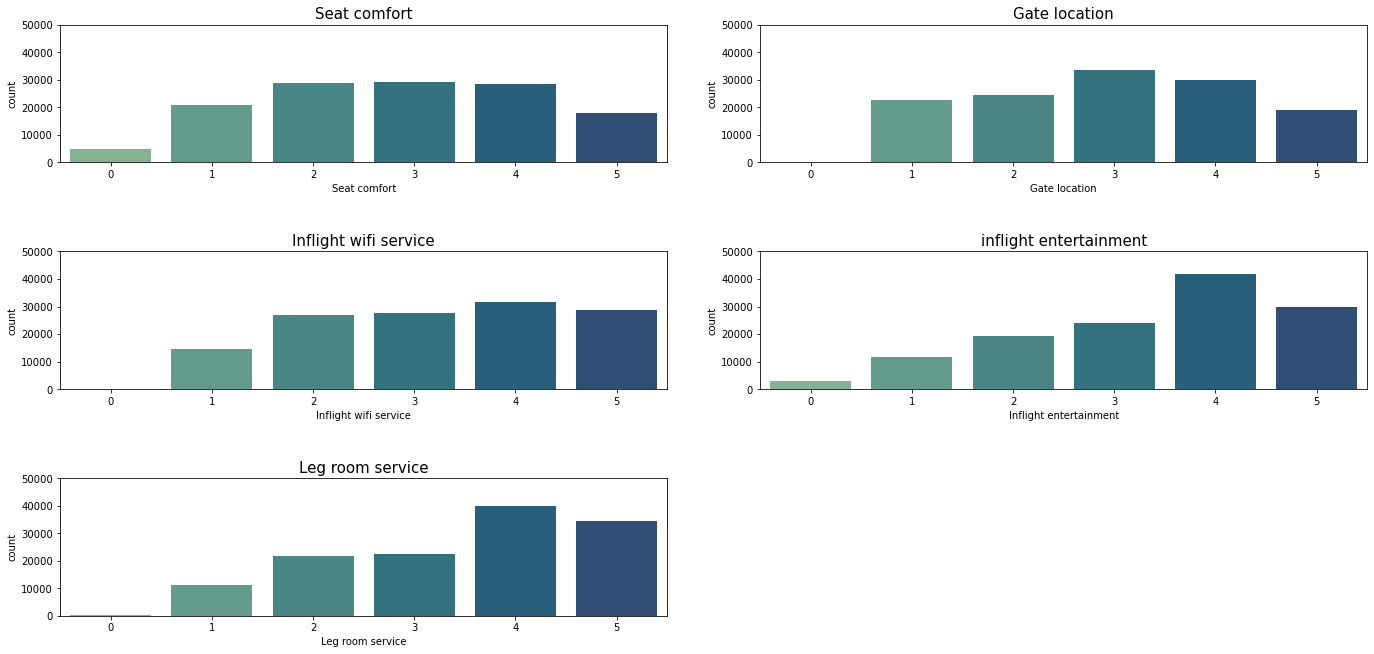

In [19]:
plt.figure(figsize = (20, 10))

plt.subplot(321)
sns.countplot(x='Seat comfort', data = data, palette = 'crest')
plt.title('Seat comfort', size = 15)
plt.ylim(0, 50000)

plt.subplot(322)
sns.countplot(x='Gate location', data = data, palette = 'crest')
plt.title('Gate location', size = 15)
plt.ylim(0, 50000)

plt.subplot(323)
sns.countplot(x='Inflight wifi service', data = data, palette = 'crest')
plt.title('Inflight wifi service', size = 15)
plt.ylim(0, 50000)

plt.subplot(324)
sns.countplot(x='Inflight entertainment', data = data, palette = 'crest')
plt.title('inflight entertainment', size = 15)
plt.ylim(0, 50000)

plt.subplot(325)
sns.countplot(x='Leg room service', data = data, palette = 'crest')
plt.title('Leg room service', size = 15)
plt.ylim(0, 50000)

plt.tight_layout(pad = 4)

# plt.savefig('8_facilities.png')
# plt.savefig('8_facilities_t.png', transparent = True)
# plt.savefig('8_facilities_t_.png', transparent = True)
plt.show()

From this visualization, we can see that in airline facilities aspect:
- The seat comfort and gate location of the plane is the most unliked by passenger
- There are many passengers who give 1 and 2 points in food and drink aspect.
- The best aspect from inflight service is infligh entertainment and leg room service.

 #### __Which aspect of the services offered by them have to be emphasized more to generate more satisfied passengers?__

Here, I will assume that the aspect that need to be improved are those that have the most value in level 1 and Level 2.
And i just take one aspect from every categories for trial improvement.

__AIRLINE SERVICE(BEFORE FLIGHT)__

In [20]:
#Make dataframe about satisfaction level per aspect based on neutral/dissatisfied passenger.

dissatisfied = data[data['Satisfaction'] == 'neutral or dissatisfied']['Satisfaction']

tab = pd.DataFrame()
tab['departure'] = data['Departure/Arrival time convenient'].groupby(dissatisfied).value_counts()
tab['onlinesupport'] = data['Online support'].groupby(dissatisfied).value_counts()
tab['easybooking'] = data['Ease of Online booking'].groupby(dissatisfied).value_counts()
tab['baggage'] = data['Baggage handling'].groupby(dissatisfied).value_counts()
tab['checkin'] = data['Checkin service'].groupby(dissatisfied).value_counts()
tab['online_boarding'] = data['Online boarding'].groupby(dissatisfied).value_counts()
tab['Total'] = tab[['departure', 'onlinesupport', 'easybooking', 'baggage', 'checkin' ,'online_boarding']].sum(axis=1)


tab.reset_index(inplace = True)
tab.drop('Satisfaction', axis = 1, inplace = True)
tab.rename(columns={'Departure/Arrival time convenient': 'Level'}, inplace = True)
tab

,Level,departure,onlinesupport,easybooking,baggage,checkin,online_boarding,Total
0,4,14070,13262,11280,19859.0,15431,12235,86137.0
1,5,11893,8066,8008,9450.0,7136,8040,52593.0
2,3,10678,15499,14403,16764.0,15378,13861,86583.0
3,2,10482,12141,14240,8117.0,10339,13352,68671.0
4,1,8617,9824,10844,4603.0,10508,11291,55687.0
5,0,3053,1,18,NaN,1,14,3087.0


In [21]:
#make it in percentage view
tab_perc = tab.copy()

tab_perc['departure'] = tab['departure']/tab['Total']*100
tab_perc['onlinesupport'] = tab['onlinesupport']/tab['Total']*100
tab_perc['easybooking'] = tab['easybooking']/tab['Total']*100
tab_perc['baggage'] = tab['baggage']/tab['Total']*100
tab_perc['checkin'] = tab['checkin']/tab['Total']*100
tab_perc['online_boarding'] = tab['online_boarding']/tab['Total']*100


tab_perc['Total'] = tab_perc[['departure', 'onlinesupport', 'easybooking', 'baggage', 'checkin', 'online_boarding']].sum(axis = 1)
tab_perc

,Level,departure,onlinesupport,easybooking,baggage,checkin,online_boarding,Total
0,4,16.334444,15.396403,13.095418,23.055133,17.914485,14.204117,100.0
1,5,22.613276,15.336642,15.226361,17.968171,13.568346,15.287206,100.0
2,3,12.332675,17.900743,16.634905,19.361768,17.760992,16.008916,100.0
3,2,15.264085,17.679952,20.736555,11.820128,15.055846,19.443433,100.0
4,1,15.473989,17.641460,19.473127,8.265843,18.869754,20.275827,100.0
5,0,98.898607,0.032394,0.583090,NaN,0.032394,0.453515,100.0


In [43]:
service_beforeflight = tab_perc.iloc[:, :-1].sort_values(by=['Level'])
service_beforeflight

,Level,departure,onlinesupport,easybooking,baggage,checkin,online_boarding
5,0,98.898607,0.032394,0.583090,NaN,0.032394,0.453515
4,1,15.473989,17.641460,19.473127,8.265843,18.869754,20.275827
3,2,15.264085,17.679952,20.736555,11.820128,15.055846,19.443433
2,3,12.332675,17.900743,16.634905,19.361768,17.760992,16.008916
0,4,16.334444,15.396403,13.095418,23.055133,17.914485,14.204117
1,5,22.613276,15.336642,15.226361,17.968171,13.568346,15.287206


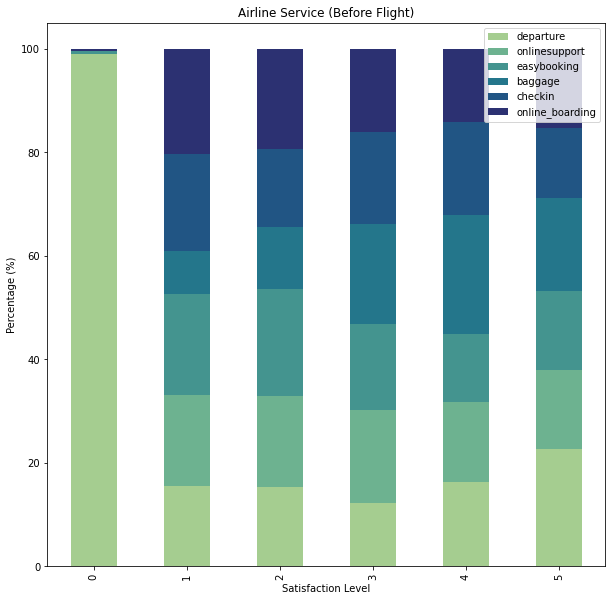

In [44]:
#Make a barstack percentage plot

service_beforeflight.plot(x = 'Level',  
    kind = 'bar', 
    stacked = True, 
    title = 'Airline Service (Before Flight)',
    mark_right = True,
    figsize=(10,10),
    colormap = 'crest')

plt.xlabel('Satisfaction Level')
plt.ylabel('Percentage (%)')


plt.show()

From the visualization we can see that the worst aspect are Ease of Online booking and Online boarding services.
<br> The data shows that there is a very small difference in the total of level 1 and level two from both services.
<br> These aspect should be considered and improved.

#### __AIRLINE SERVICE (IN FLIGHT)__

In [26]:
#Make dataframe about satisfaction level per aspect based on neutral/dissatisfied passenger.

dissatisfied = data[data['Satisfaction'] == 'neutral or dissatisfied']['Satisfaction']

tab1 = pd.DataFrame()
tab1['fooddrink'] = data['Food and drink'].groupby(dissatisfied).value_counts()
tab1['onboardservice'] = data['On-board service'].groupby(dissatisfied).value_counts()
tab1['cleanliness'] = data['Cleanliness'].groupby(dissatisfied).value_counts()

tab1['Total'] = tab1[['fooddrink', 'onboardservice', 'cleanliness']].sum(axis=1)

tab1.reset_index(inplace = True)
tab1.drop('Satisfaction', axis = 1, inplace = True)
tab1.rename(columns={'Food and drink': 'Level'}, inplace = True)
tab1

,Level,fooddrink,onboardservice,cleanliness,Total
0,3,16088,15937,16358,48383
1,2,15406,11324,7985,34715
2,4,11153,14355,20166,45674
3,1,10361,9735,4635,24731
4,5,4473,7437,9644,21554
5,0,1312,5,5,1322


In [27]:
#make it in percentage view

tab_perc1 = tab1.copy()

tab_perc1['fooddrink'] = tab1['fooddrink']/tab1['Total']*100
tab_perc1['onboardservice'] = tab1['onboardservice']/tab1['Total']*100
tab_perc1['cleanliness'] = tab1['cleanliness']/tab1['Total']*100


tab_perc1['Total'] = tab_perc1[['fooddrink', 'onboardservice', 'cleanliness']].sum(axis = 1)
tab_perc1

,Level,fooddrink,onboardservice,cleanliness,Total
0,3,33.251349,32.939256,33.809396,100.0
1,2,44.378511,32.619905,23.001584,100.0
2,4,24.418706,31.429260,44.152034,100.0
3,1,41.894788,39.363552,18.741660,100.0
4,5,20.752529,34.504036,44.743435,100.0
5,0,99.243570,0.378215,0.378215,100.0


In [41]:
service_inflight = tab_perc1.iloc[:, :-1].sort_values(by=['Level'])
service_inflight

,Level,fooddrink,onboardservice,cleanliness
5,0,99.243570,0.378215,0.378215
3,1,41.894788,39.363552,18.741660
1,2,44.378511,32.619905,23.001584
0,3,33.251349,32.939256,33.809396
2,4,24.418706,31.429260,44.152034
4,5,20.752529,34.504036,44.743435


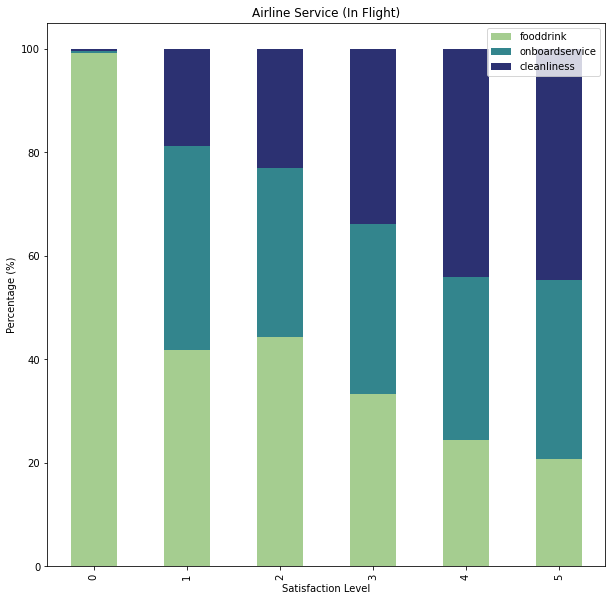

In [42]:
#Make a barstack percentage plot

service_inflight.plot(x = 'Level',  
    kind = 'bar', 
    stacked = True, 
    title = 'Airline Service (In Flight)',
    figsize=(10,10),
    colormap = 'crest')

plt.xlabel('Satisfaction Level')
plt.ylabel('Percentage (%)')


plt.show()

From the visualization we can see that the worst aspect are Food and drink.
<br> There may be a problem with these services because the total of level 1 and level 2 is quite far from the others.
<br> This aspect should be considered and improved.

#### __AIRLINE FACILITIES__

In [31]:
#Make dataframe about satisfaction level per aspect based on neutral/dissatisfied passenger.

dissatisfied = data[data['Satisfaction'] == 'neutral or dissatisfied']['Satisfaction']

tab2 = pd.DataFrame()
tab2['seatcomfort'] = data['Seat comfort'].groupby(dissatisfied).value_counts()
tab2['gatelocation'] = data['Gate location'].groupby(dissatisfied).value_counts()
tab2['wifiservice'] = data['Inflight wifi service'].groupby(dissatisfied).value_counts()
tab2['inflight_ent'] = data['Inflight entertainment'].groupby(dissatisfied).value_counts()
tab2['legroom'] = data['Leg room service'].groupby(dissatisfied).value_counts()


tab2['Total'] = tab2[['seatcomfort', 'gatelocation', 'wifiservice', 'inflight_ent', 'legroom']].sum(axis=1)


tab2.reset_index(inplace = True)
tab2.drop('Satisfaction', axis = 1, inplace = True)
tab2.rename(columns={'Seat comfort': 'Level'}, inplace = True)
tab2

,Level,seatcomfort,gatelocation,wifiservice,inflight_ent,legroom,Total
0,3,18794,18012.0,13535,19385,14113,83839.0
1,2,18454,10295.0,13464,15912,13559,71684.0
2,1,11503,8778.0,10762,9325,7980,48348.0
3,4,9891,15109.0,11423,11729,12984,61136.0
4,5,141,6599.0,9536,1430,10020,27726.0
5,0,10,NaN,73,1012,137,1232.0


In [32]:
#make it in percentage view
tab_perc2 = tab2.copy()

tab_perc2['seatcomfort'] = tab2['seatcomfort']/tab2['Total']*100
tab_perc2['gatelocation'] = tab2['gatelocation']/tab2['Total']*100
tab_perc2['wifiservice'] = tab2['wifiservice']/tab2['Total']*100
tab_perc2['inflight_ent'] = tab2['inflight_ent']/tab2['Total']*100
tab_perc2['legroom'] = tab2['legroom']/tab2['Total']*100



tab_perc2['Total'] = tab_perc2[['seatcomfort', 'gatelocation', 'wifiservice', 'inflight_ent', 'legroom']].sum(axis = 1)
tab_perc2

,Level,seatcomfort,gatelocation,wifiservice,inflight_ent,legroom,Total
0,3,22.416775,21.484035,16.144038,23.121698,16.833455,100.0
1,2,25.743541,14.361643,18.782434,22.197422,18.914960,100.0
2,1,23.792091,18.155870,22.259452,19.287251,16.505336,100.0
3,4,16.178684,24.713753,18.684572,19.185096,21.237896,100.0
4,5,0.508548,23.800765,34.393710,5.157614,36.139364,100.0
5,0,0.811688,NaN,5.925325,82.142857,11.120130,100.0


In [48]:
facilities = tab_perc2.iloc[:, :-1].sort_values(by=['Level'])
facilities

,Level,seatcomfort,gatelocation,wifiservice,inflight_ent,legroom
5,0,0.811688,NaN,5.925325,82.142857,11.120130
2,1,23.792091,18.155870,22.259452,19.287251,16.505336
1,2,25.743541,14.361643,18.782434,22.197422,18.914960
0,3,22.416775,21.484035,16.144038,23.121698,16.833455
3,4,16.178684,24.713753,18.684572,19.185096,21.237896
4,5,0.508548,23.800765,34.393710,5.157614,36.139364


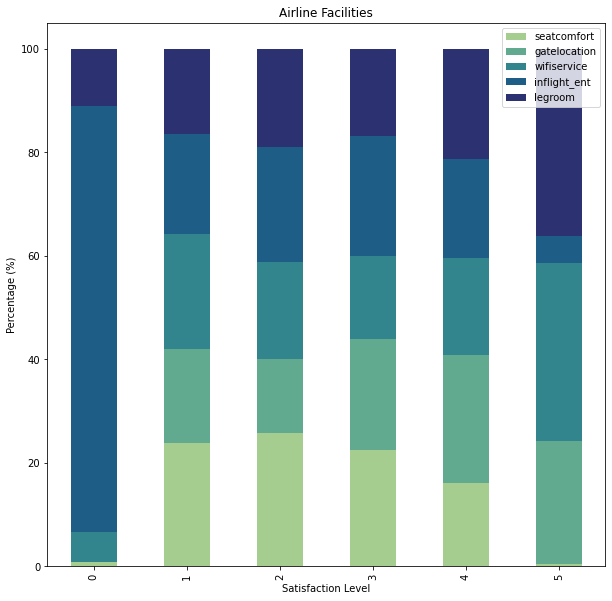

In [49]:
#Make a barstack percentage plot

facilities.plot(x = 'Level',  
    kind = 'bar', 
    stacked = True, 
    title = 'Airline Facilities',
    mark_right = True,
    figsize=(10,10),
    colormap = 'crest')

plt.xlabel('Satisfaction Level')
plt.ylabel('Percentage (%)')


plt.show()

From the visualization we can see that the worst aspect are Seat Comfort.
<br> There may be a problem with these services because the total of level 1 and level 2 is quite far from the others.
<br> This aspect should be considered and improved.